## 과제
이름: 이원석

학번: 201902702

학과: 컴퓨터전자시스템공학부

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread('china.jpg')
cv.imshow("org", img)

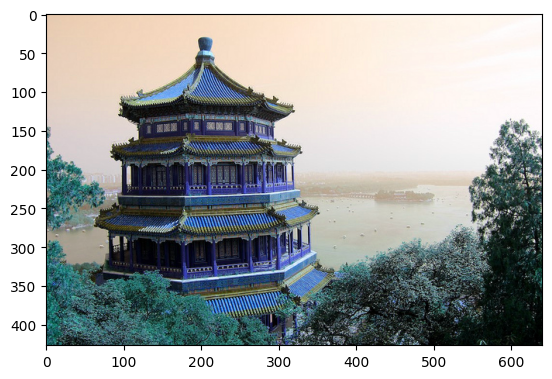

In [3]:
plt.imshow(img)
plt.show()

## 과제 1번 
### 파일에서 읽은 영상에 대해 가로 세로를 1/3로 줄인 영상을 생성하는 함수를 작성함. China 영상을 이용하여 결과를 확인

In [4]:
img.shape

(427, 640, 3)

In [9]:
def resize_image(image_path):
    image = cv.imread(image_path)
    resized_image = cv.resize(image, (image.shape[1] // 3, image.shape[0] // 3))
    return resized_image

(142, 213, 3)


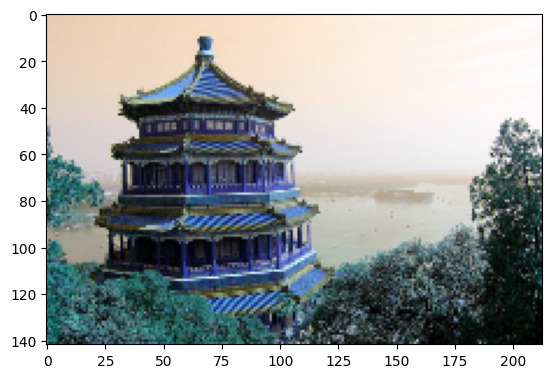

In [13]:
resize_china = resize_image('china.jpg')
print(resize_china.shape)
plt.imshow(resize_china)
plt.show()

## 과제 2번
### Bilinear(양선형) interpolation
color_rect 함수를 수정하여 오른쪽 그림과 같이 256x256 크 기의 color 영상을 bilinear interpolation에 의해 생성하는 프 로그램을 작성.

방법:

a. 네 모서리의 색을 지정: (255, 0, 0), (0, 0, 255), (0, 255, 0),
(255, 255, 0) 등

b. 나머지 화소들의 색상을 bilinear interpolation 에 의해 계산함.
오른쪽 그림과 동일한 결과가 얻어지는지 확인할 것.

(255, 0, 0) - 빨간색 

(0, 0, 255) - 파란색

(0, 255, 0) - 연두색 

(255, 255, 0) - 노란색 

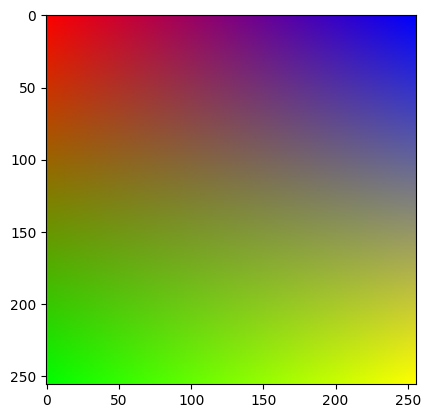

In [24]:
def color_rect():
    # Color rectangle 생성
    g = np.zeros((256, 256, 3), dtype=np.uint8)
    
    # 네 모서리에 색상 지정
    top_left = np.array([255, 0, 0])  # 빨간색
    top_right = np.array([0, 0, 255])  # 파란색
    bottom_left = np.array([0, 255, 0])  # 초록색
    bottom_right = np.array([255, 255, 0])  # 노란색
    
    for i in range(256):
        for j in range(256):
            weight_left = 1 - j / 255.0
            weight_right = j / 255.0
            weight_top = 1 - i / 255.0
            weight_bottom = i / 255.0
            
            # Bilinear Interpolation
            color = (top_left * weight_top * weight_left +
                     top_right * weight_top * weight_right +
                     bottom_left * weight_bottom * weight_left +
                     bottom_right * weight_bottom * weight_right)
            g[i, j] = np.clip(color, 0, 255).astype(np.uint8)
    
    return g

image_data = color_rect()
plt.imshow(image_data)
plt.show()
